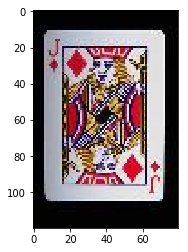

In [2]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob

image_list = []
image_name = []
path = '2Classes/*.jpg'
for filename in glob.glob(path): #assuming gif
    im=mpimg.imread(filename)
    image_name.append(filename[9:])
    image_list.append(im)

plt.imshow(image_list[102])
plt.show()

In [3]:
def colorFeature(im):
    R = im[:,:,0]
    G = im[:,:,1]
    B = im[:,:,2]
    rs = cv2.cvtColor(im, cv2.COLOR_BGR2YCrCb)
    return [np.mean(R), np.std(R), np.mean(G), np.std(G), np.mean(B), np.std(B), np.mean(rs), np.std(rs)]
print(colorFeature(image_list[102]))

[110.4528125, 95.75721503716144, 93.90864583333334, 93.49871483207438, 97.08677083333333, 94.6785574544512, 120.2323263888889, 57.4788223392284]


In [4]:
def hsvHistFeature(im):
    img = cv2.cvtColor(im, cv2.COLOR_RGB2HLS)
    h = cv2.calcHist([img],[0],None,[8],[0, 8]) / np.max(img[:,:,0])
    s = cv2.calcHist([img],[1],None,[2],[0, 2]) / np.max(img[:,:,1])
    v = cv2.calcHist([img],[2],None,[2],[0, 2]) / np.max(img[:,:,2])
    return np.concatenate((h, s, v), axis=None)
    
res = hsvHistFeature(image_list[102])
print(res)

[12.455556    0.2         0.21666667  0.25        0.21111111  0.29444444
  0.28333333  0.1388889   0.5294118   1.0980393   8.156863    0.        ]


In [6]:
from skimage import feature

def textureFeature(im):
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    glcm = feature.greycomatrix(gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], symmetric=True, normed=True)
    stats = feature.greycoprops(glcm, prop='contrast')
    return stats

res = textureFeature(image_list[102])
print(res)

[[4684.47352321 5548.96553558 3549.44726891 5360.17434315]]


In [7]:
def createFeatures(db):
    features = []
    for im in db:
        im_c = colorFeature(im)
        hsvHf = hsvHistFeature(im)
#         tx = textureFeature(im)
        features.append(np.concatenate((im_c, hsvHf), axis=None))
    return features

features = createFeatures(image_list)
print(np.shape(features))


(200, 20)


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(features)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(features, quantile=0.2, n_samples=200)
clustering = MeanShift(bin_seeding=True, min_bin_freq=2).fit(features)
labels = clustering.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
import csv
 
with open('Clusturing_AYOUBBERDEDDOUCH.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['image_id', 'classe'])
    for i, j in zip(image_name, labels):
        filewriter.writerow([i, j+1])
print('file succ saved')   

file succ saved
